<a href="https://colab.research.google.com/github/yaelgreen/ML1-Final-project/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 - Initial dataset creation

In [2]:
!pip install matplotlib
!pip install numpy

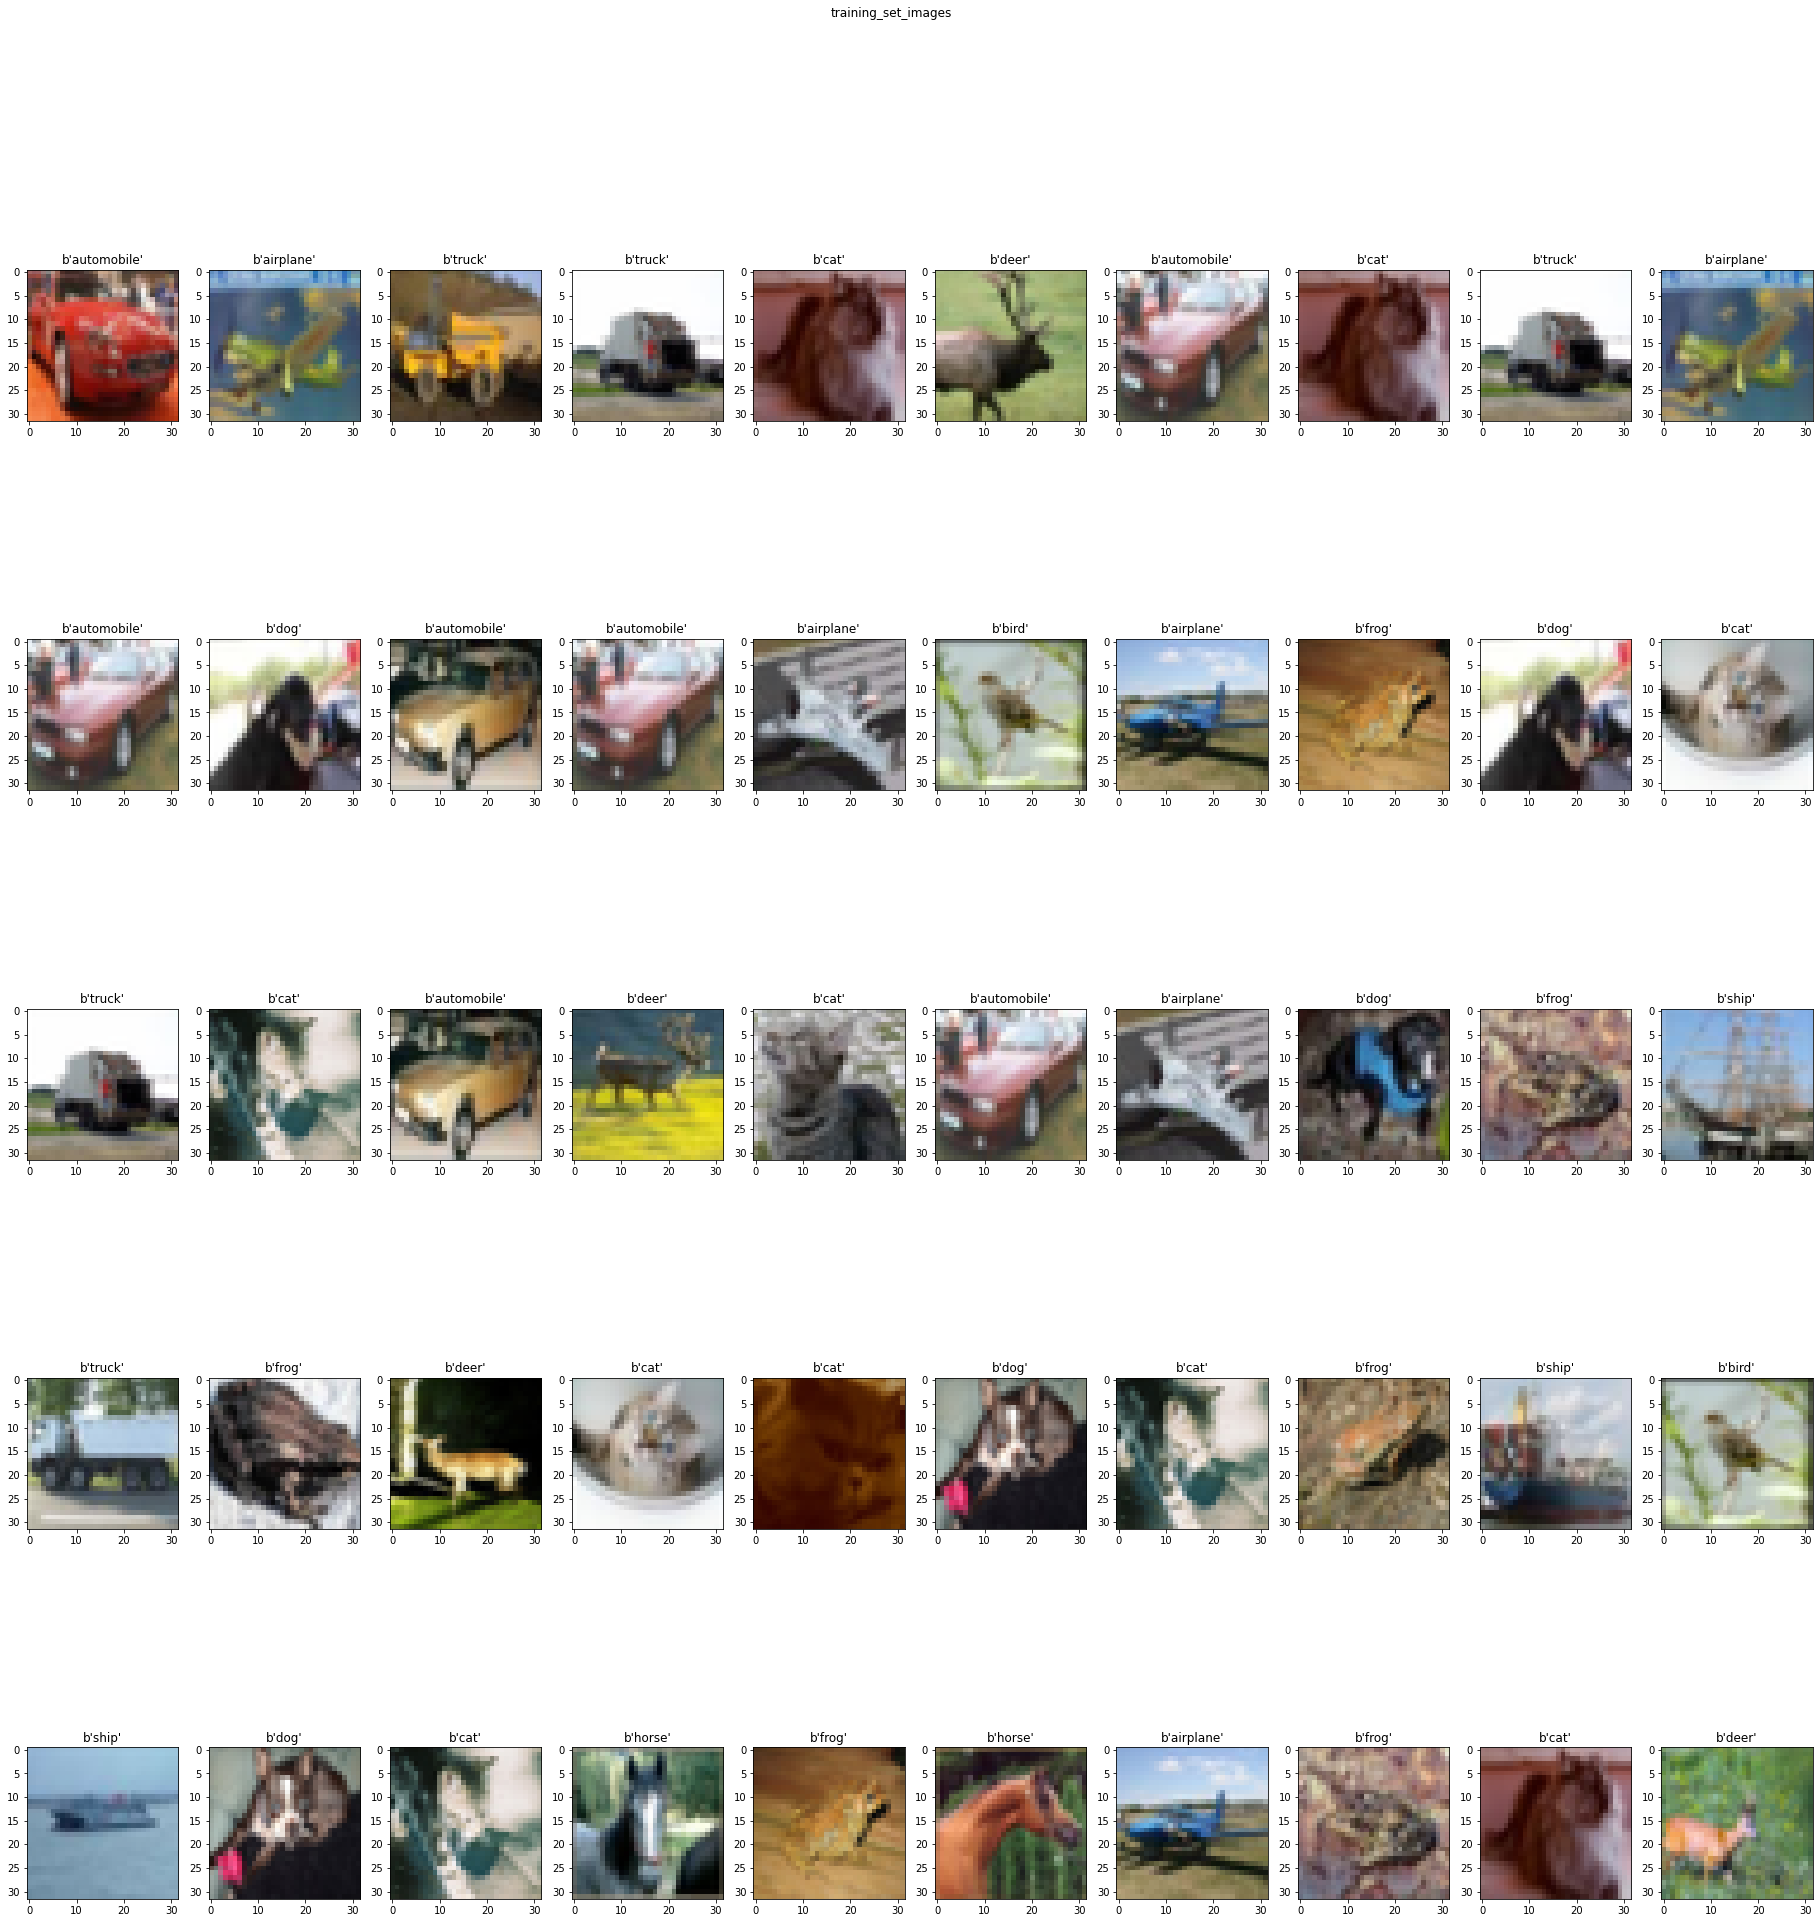

<Figure size 432x288 with 0 Axes>

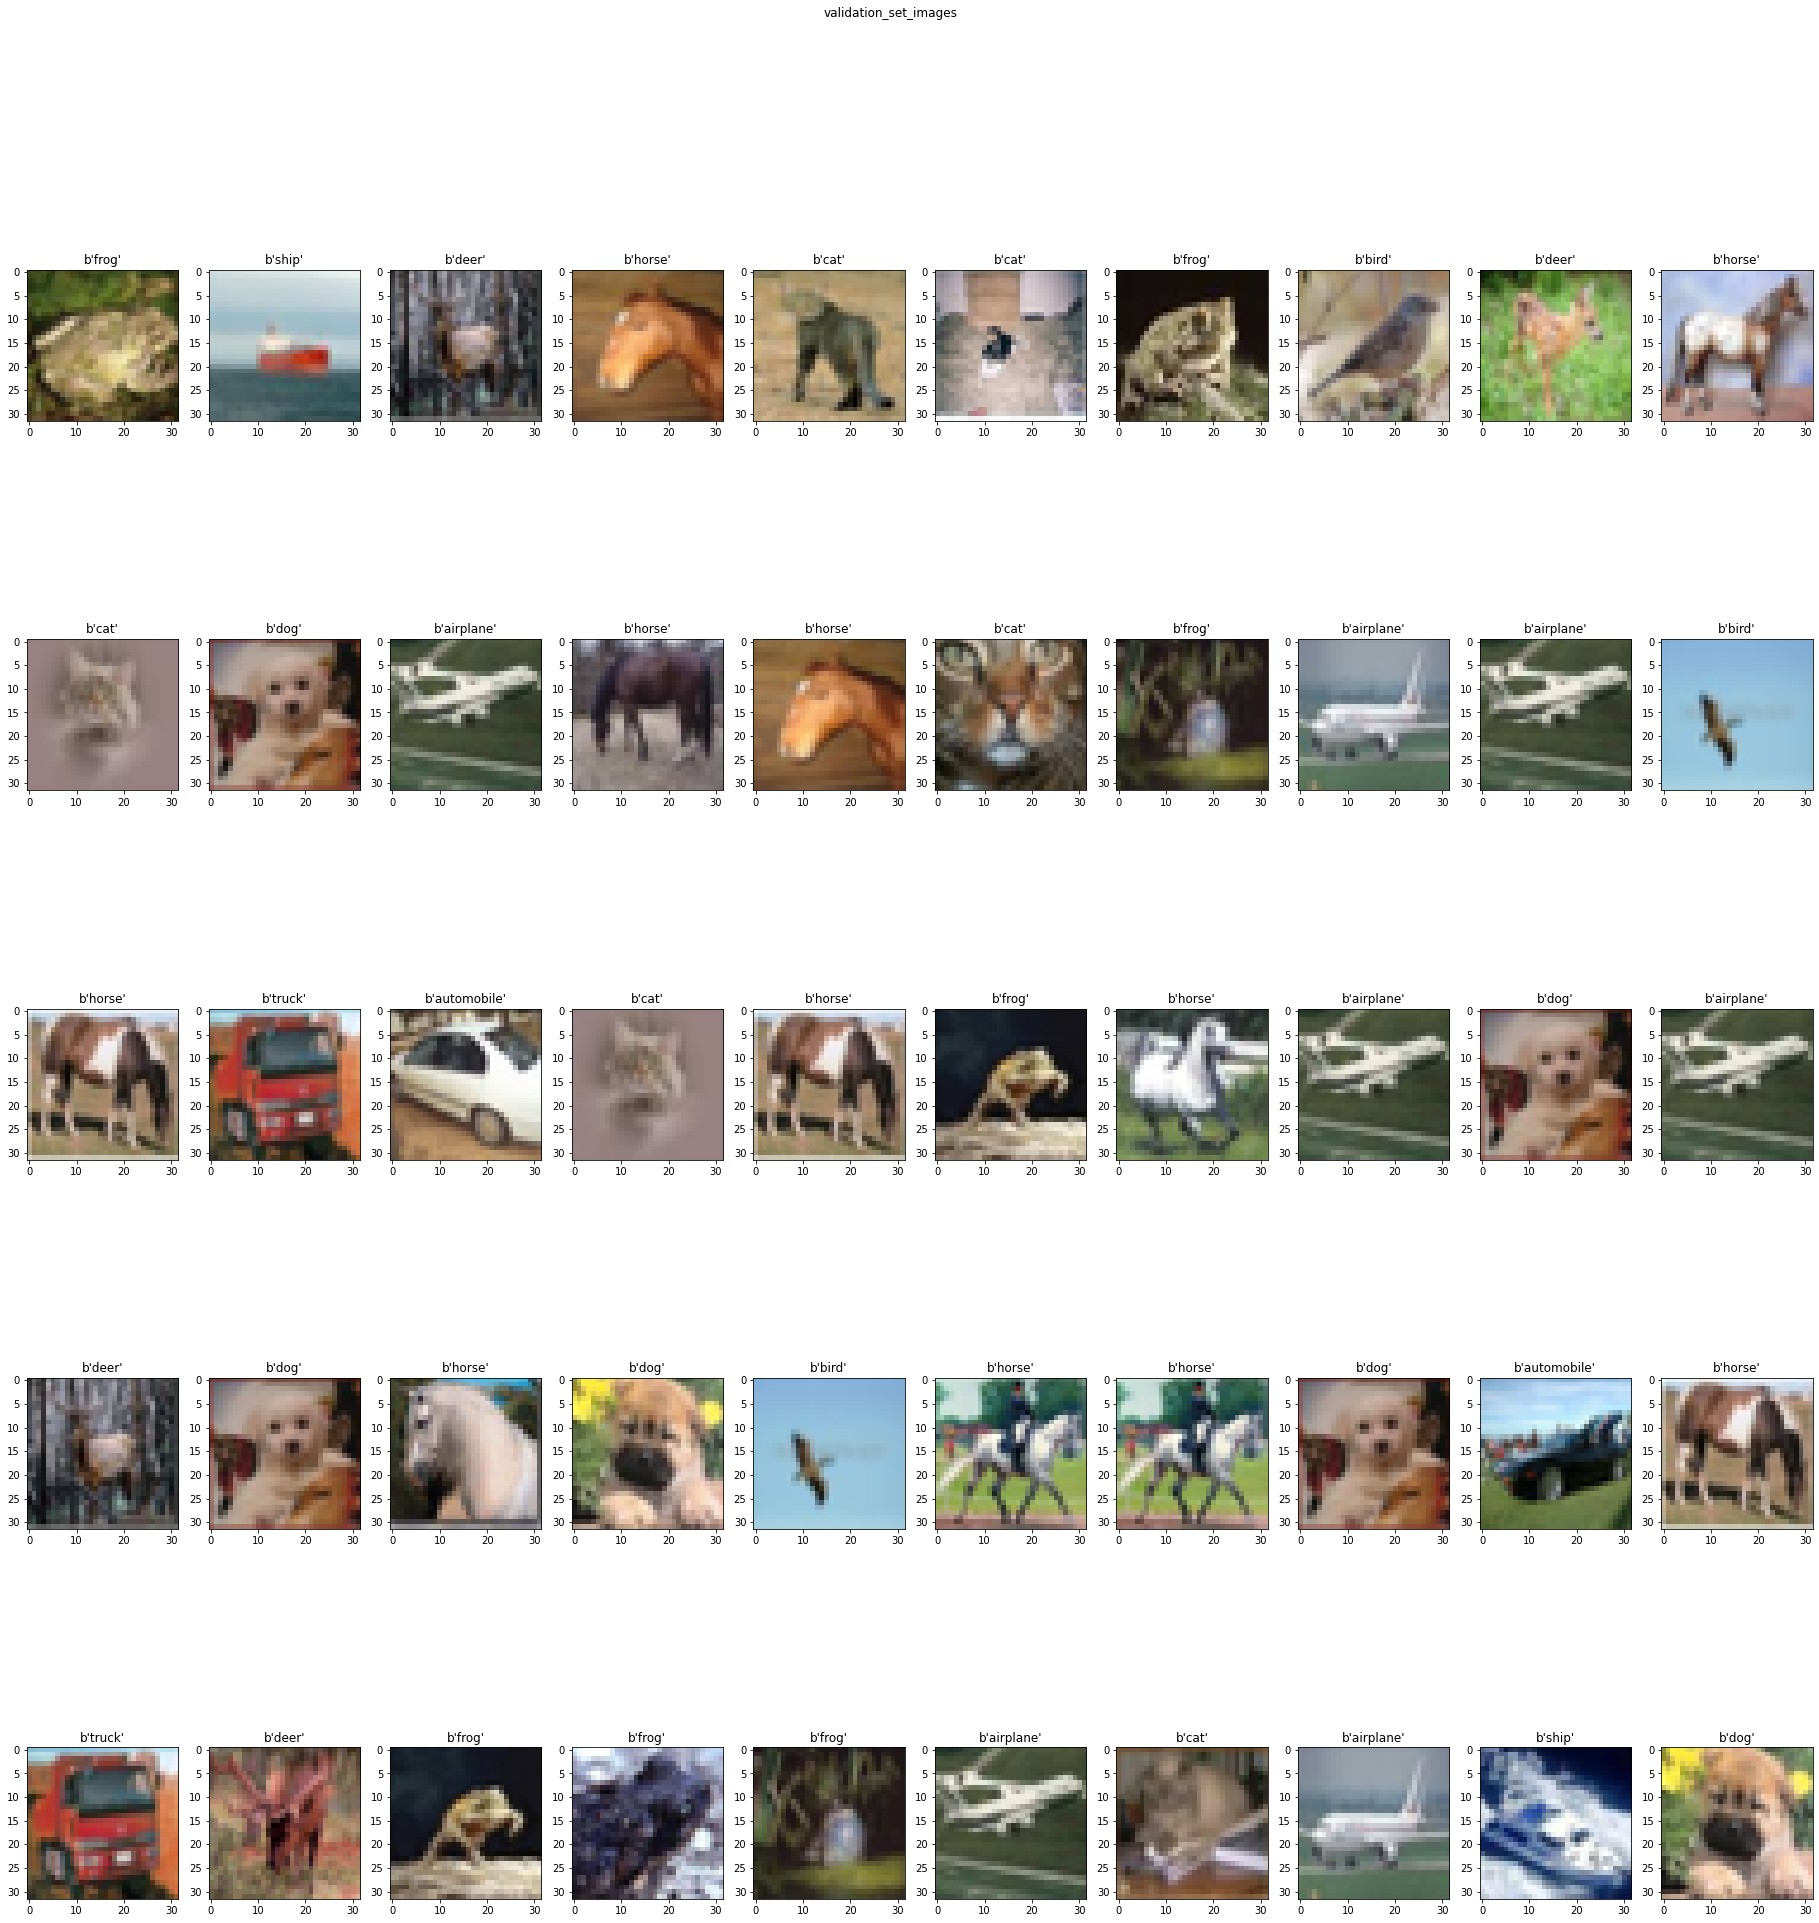

<Figure size 432x288 with 0 Axes>

In [3]:
from typing import Dict, List

import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint


def subset_of_data_set(data_set, indices):
    return {
        b'batch_label': data_set[b'batch_label'],
        b'labels': [data_set[b'labels'][i] for i in indices],
        b'data': np.take(data_set[b'data'], indices, axis=0),
        b'filenames': [data_set[b'filenames'] for i in indices],
    }


def random_indices(choose: int, out_of: int) -> List[int]:
    return [randint(0, out_of) for i in range(0, choose)]


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def mapping(x):
    return (-1 + (2 / 255) * x)


def download_and_extract_cifar_10_dataset(
        url: str = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz") -> None:
    filename = "cifar-10-python.tar.gz"

    # Download the CIFAR 10 dataset
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.raw.read())

    # Extract the tar.gz file
    import shutil
    extract_path = "cifar-10"
    shutil.unpack_archive(filename, extract_path)


def create_training_and_validation_sets(training_size: str = 1000) -> \
        (Dict, Dict, Dict):
    # load dataset
    path = os.path.join(os.getcwd(), "cifar-10", "cifar-10-batches-py")
    first_batch = unpickle(os.path.join(path, "data_batch_1"))
    # choose random 1000 images
    indices = random_indices(9999, training_size)
    training_set = subset_of_data_set(first_batch, indices)
    validation_set = unpickle(os.path.join(path, "data_batch_2"))
    meta = unpickle(os.path.join(path, "batches.meta"))
    return training_set, validation_set, meta


def plot_image(data, meta, image_index=0):
    # get image and RGB channels from dataset
    image = data[b'data'][image_index, :]
    image_r = image[0:1024].reshape(32, 32)
    image_g = image[1024:2048].reshape(32, 32)
    image_b = image[2048:].reshape(32, 32)
    # plot image using RGB channels
    img = np.dstack((image_r, image_g, image_b))
    title = meta[b'label_names'][data[b'labels'][image_index]]
    return img, title


def plot_random_images(data_set: Dict, meta: Dict, plt_title="plot",
                       number_of_images: int = 50) -> None:
    # choose random 50 images
    indices = random_indices(999, number_of_images)
    # plot images
    n_col = 10
    n_row = int(number_of_images / n_col)
    imgs = [plot_image(data_set, meta, image_index) for image_index in indices]
    _, axs = plt.subplots(n_row, n_col, figsize=(32, 32))
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img[0])
        ax.set_title(img[1])
    plt.subplots_adjust(top=0.9)
    plt.suptitle(plt_title)
    plt.show()
    plt.savefig(f"{plt_title}.png")


def convert_pixel_intensity(data_set):
    data_set[b'data'] = np.array([mapping(x) for x in data_set[b'data']])


download_and_extract_cifar_10_dataset()
training_set, validation_set, meta = create_training_and_validation_sets()
plot_random_images(training_set, meta, "training_set_images")
plot_random_images(validation_set, meta, "validation_set_images")
convert_pixel_intensity(training_set)
convert_pixel_intensity(validation_set)

In [4]:
## Part 2

learning rate 0.01 number of iterations 10 batch_size 10 momentum coefficient 0.2 l2 regularization coefficient 0.5standard_deviation 0.5
started 0 iteration
iteration: 0 cross entropy losses: 8347.06349796008
iteration: 0 hing losses: 8930.885846905468
started 1 iteration
iteration: 1 cross entropy losses: 7599.1018879579005
iteration: 1 hing losses: 8147.574265038374
started 2 iteration
iteration: 2 cross entropy losses: 6922.583568675588
iteration: 2 hing losses: 7435.90575745742
started 3 iteration
iteration: 3 cross entropy losses: 6375.185274699352
iteration: 3 hing losses: 6852.611928183778
started 4 iteration
iteration: 4 cross entropy losses: 5854.8442731398145
iteration: 4 hing losses: 6294.661453527486
started 5 iteration
iteration: 5 cross entropy losses: 5344.350311884211
iteration: 5 hing losses: 5748.025556676951
started 6 iteration
iteration: 6 cross entropy losses: 4964.894578460342
iteration: 6 hing losses: 5329.1726029388265
started 7 iteration
iteration: 7 cross ent

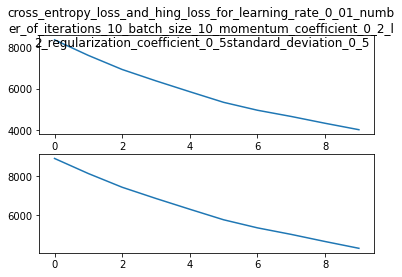

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

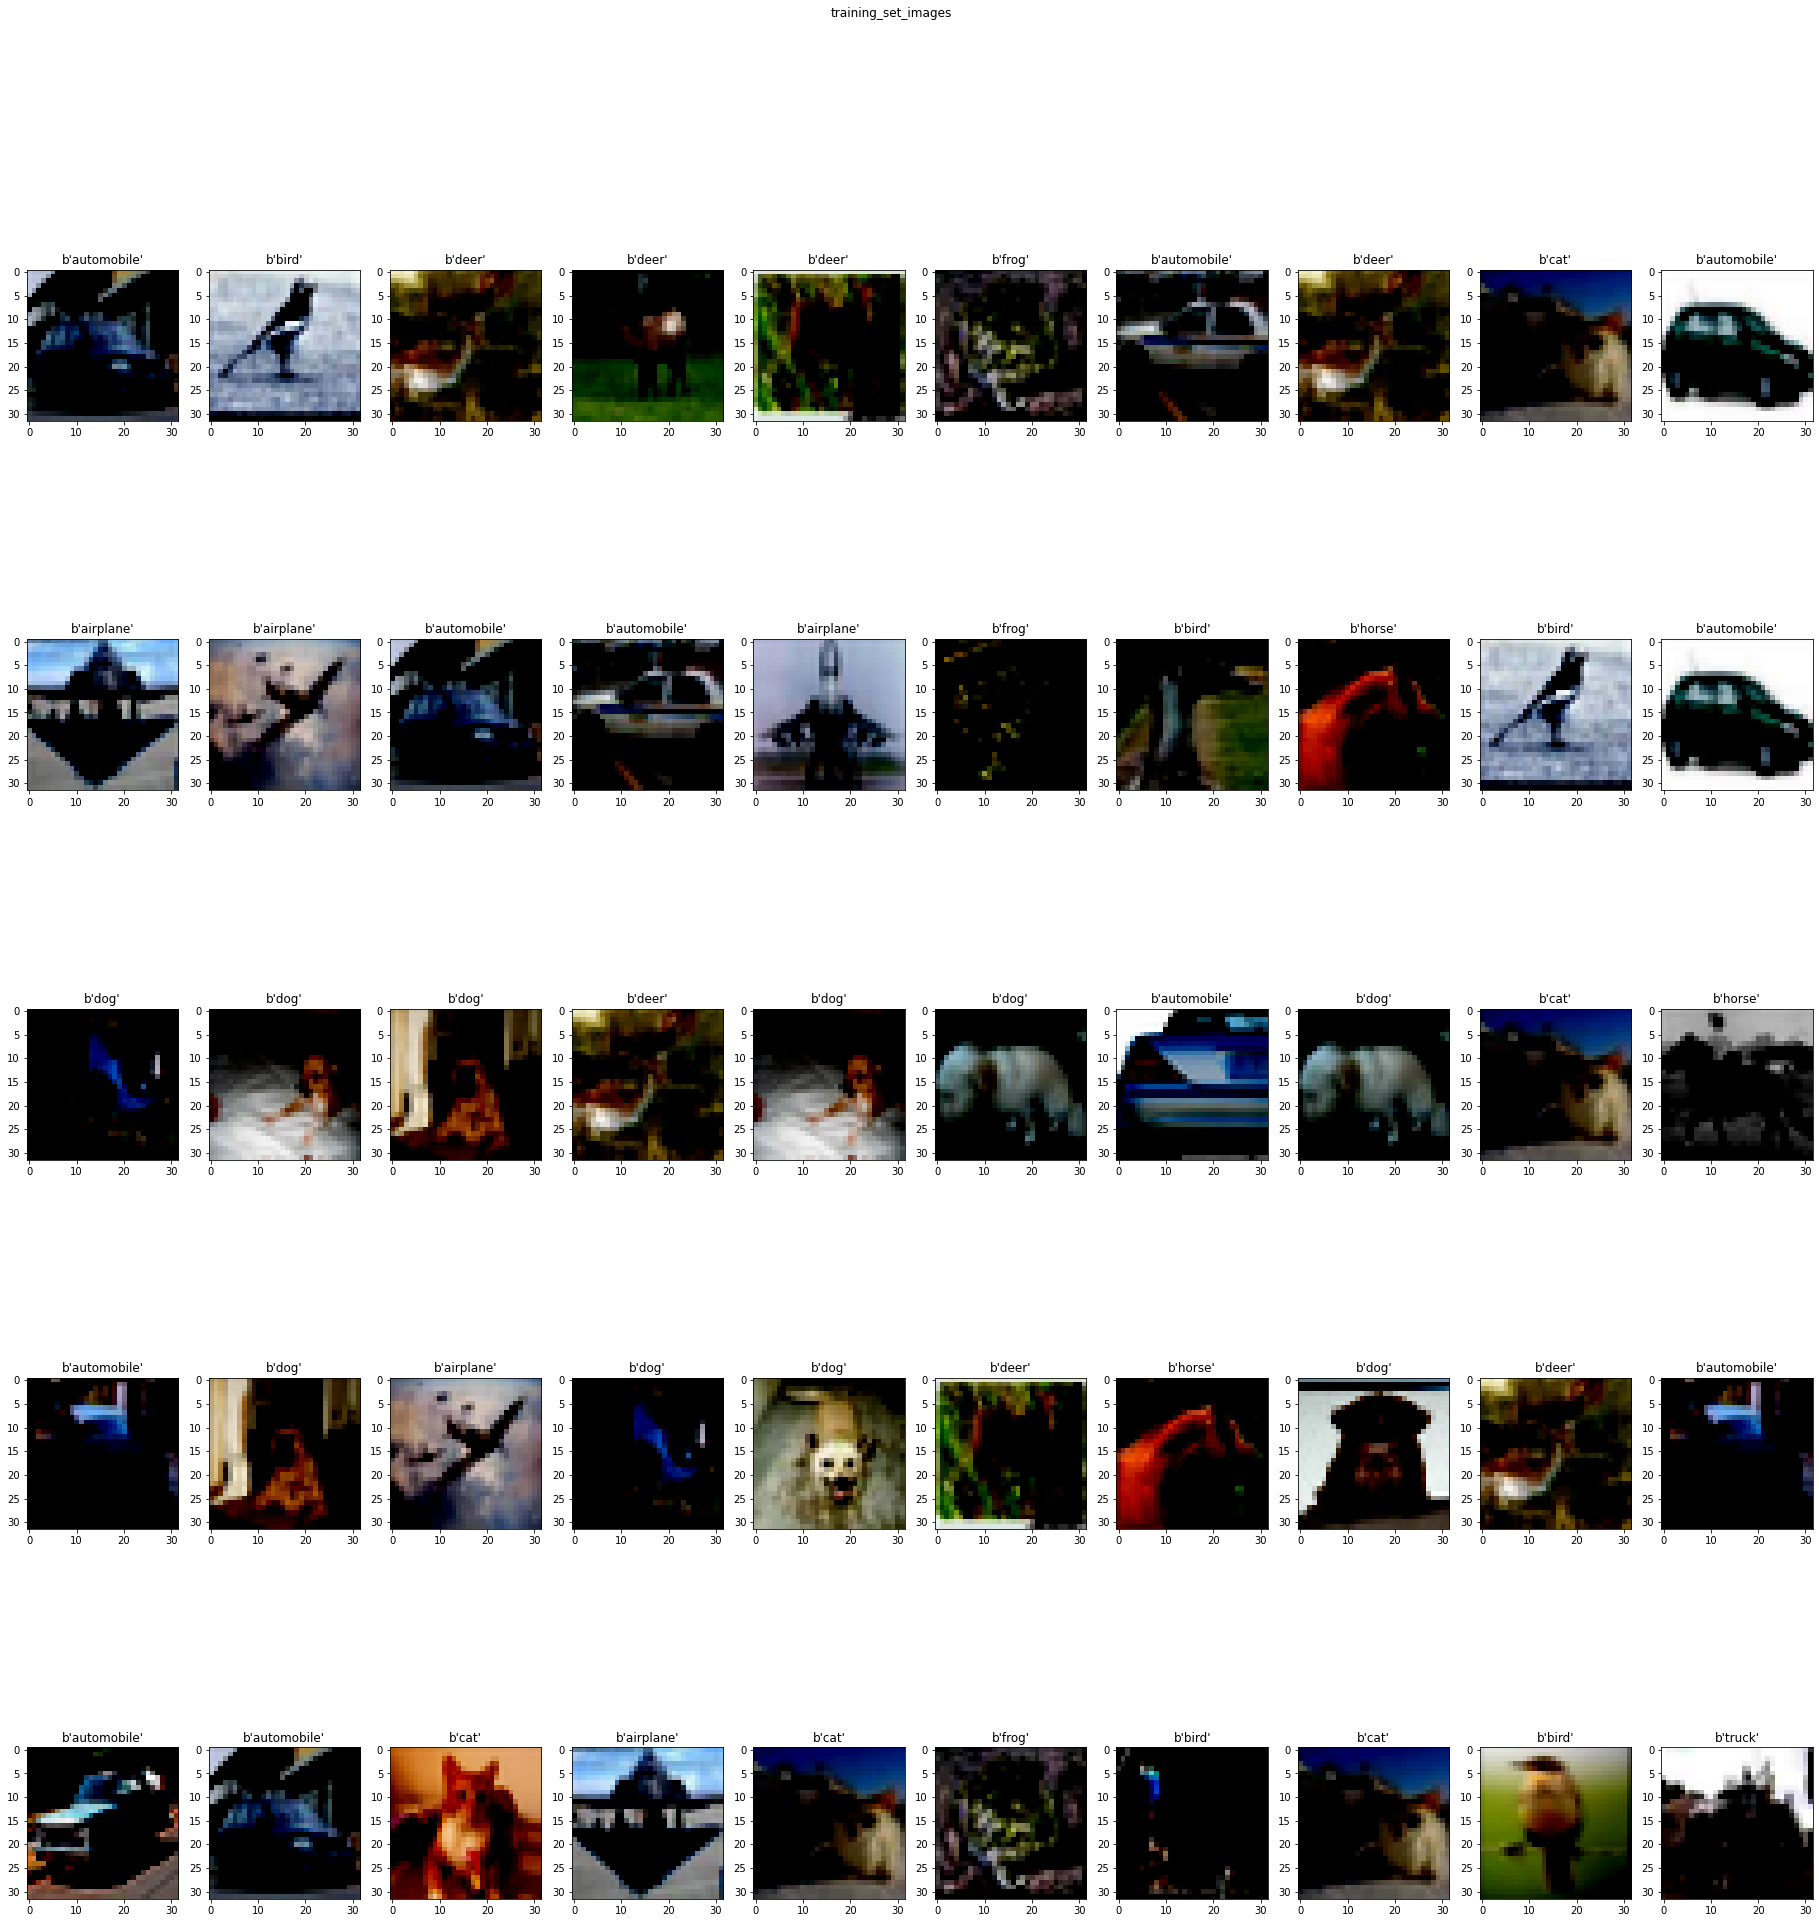

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

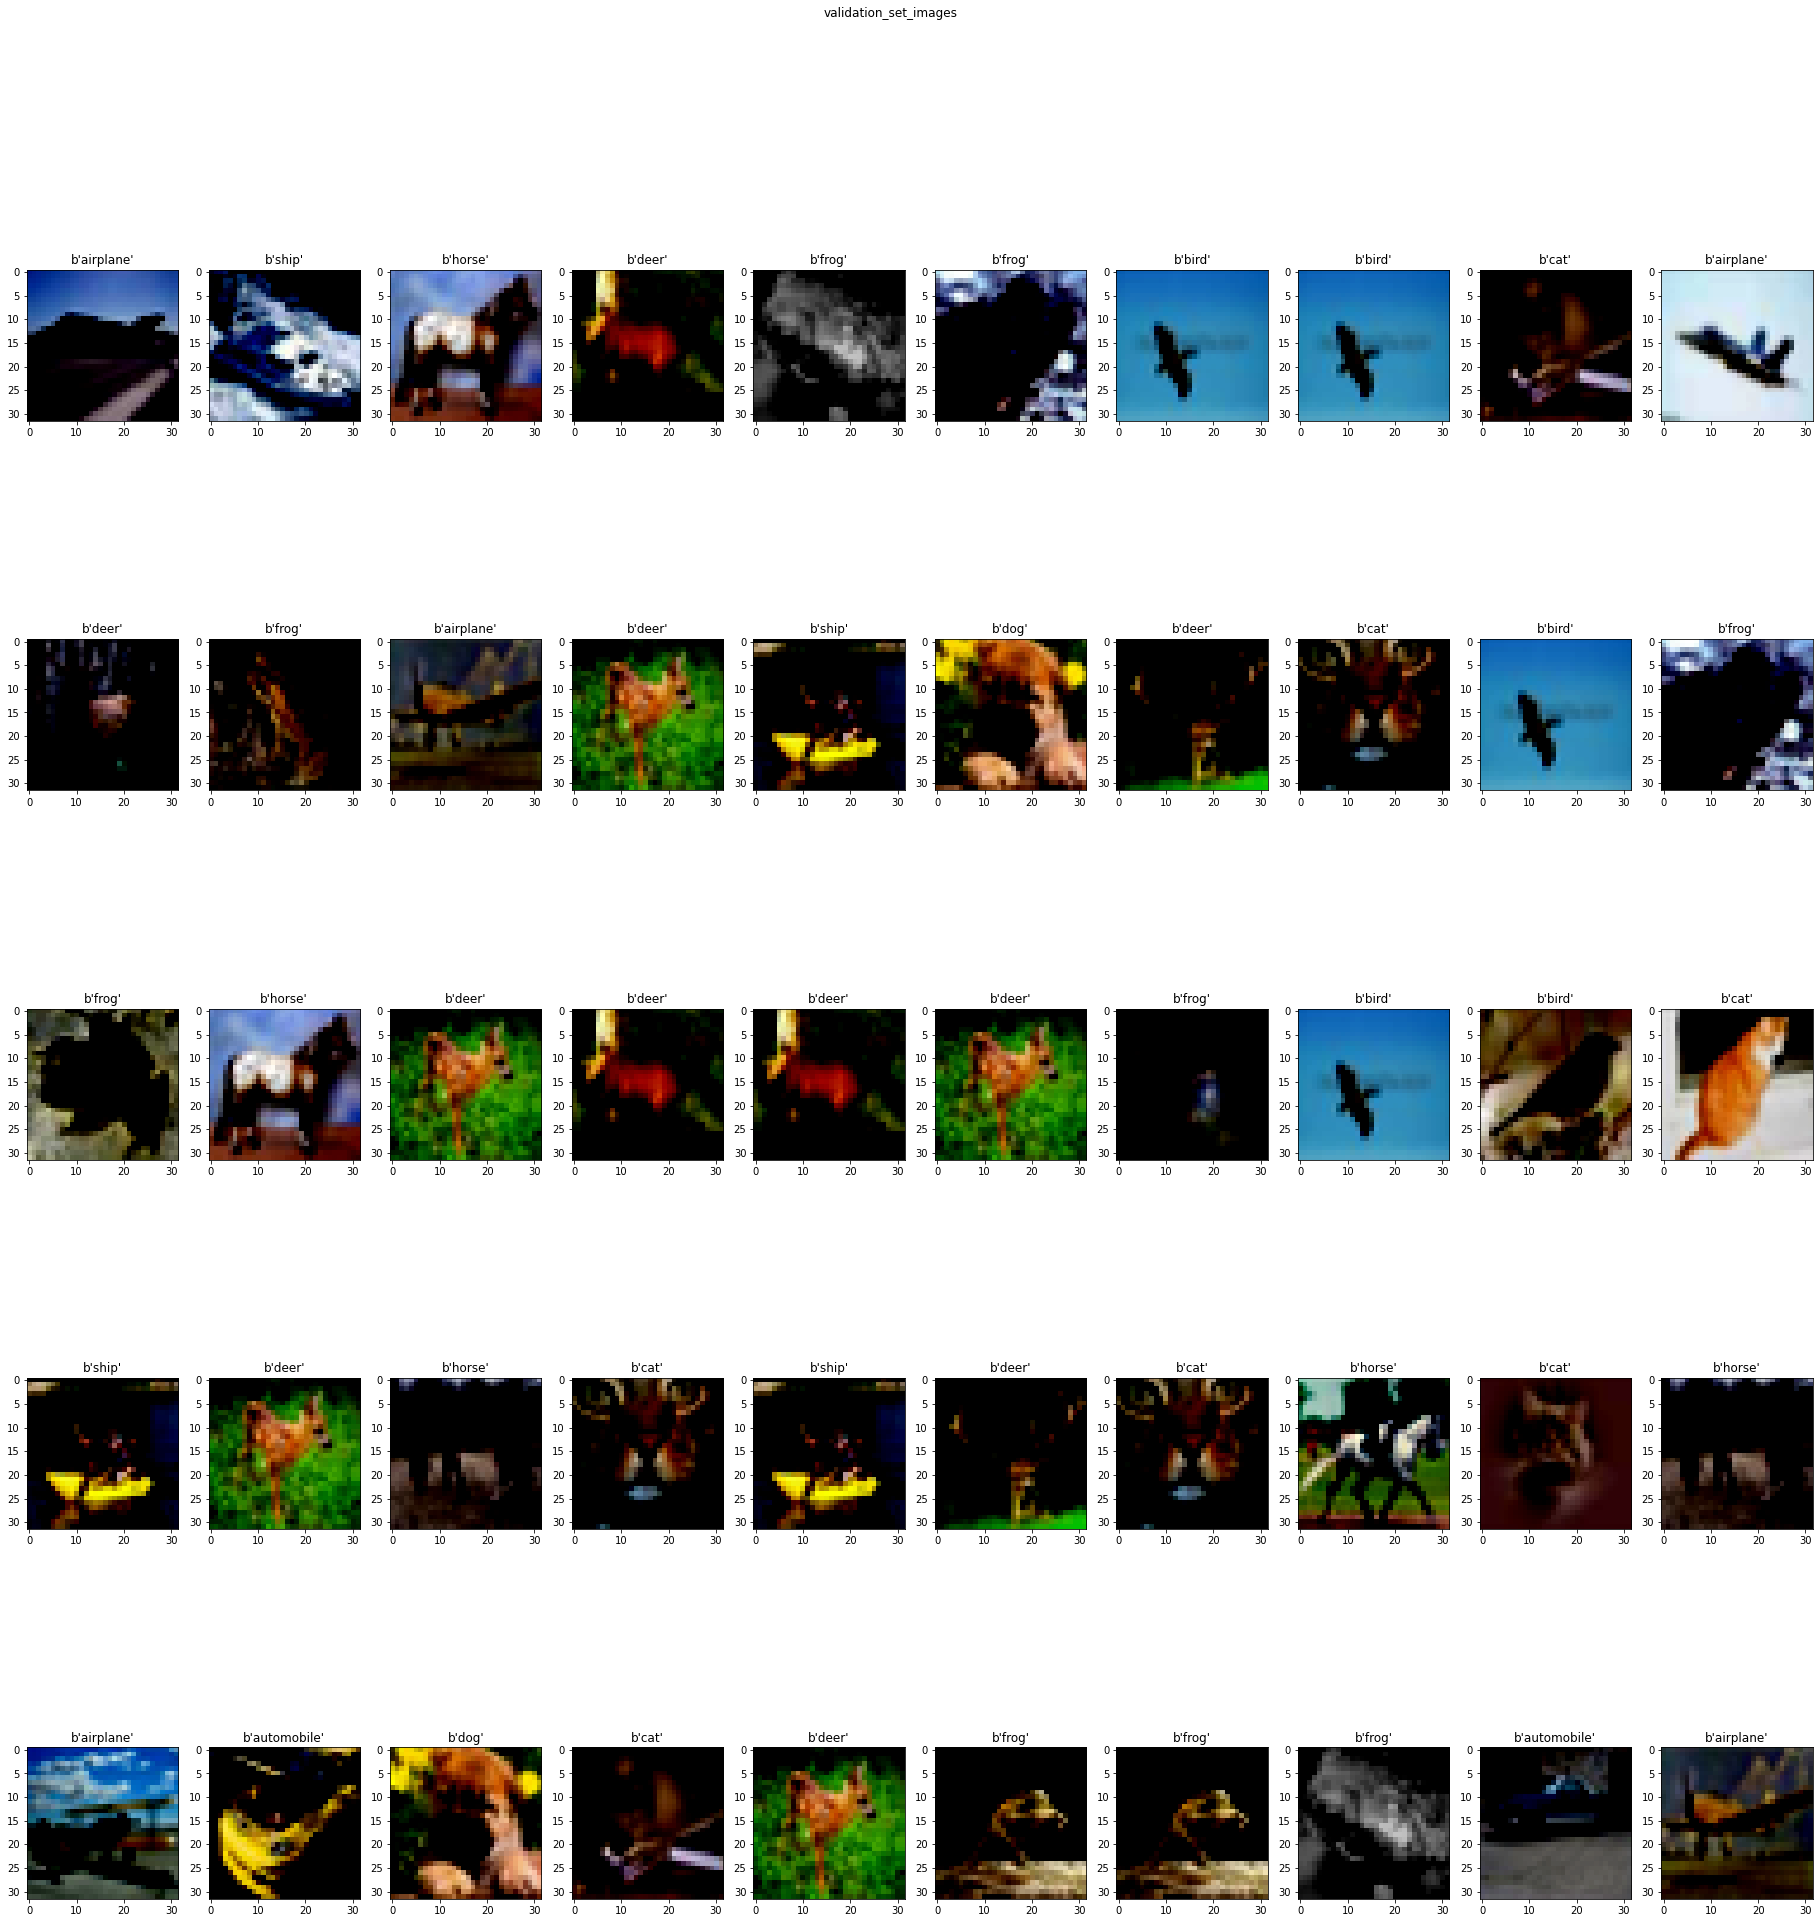

learning rate 0.01 number of iterations 10 batch_size 10 momentum coefficient 0.3 l2 regularization coefficient 0.4standard_deviation 0.5
started 0 iteration
iteration: 0 cross entropy losses: 9697.54915959273
iteration: 0 hing losses: 10307.981175087607
started 1 iteration
iteration: 1 cross entropy losses: 8975.13739086116
iteration: 1 hing losses: 9562.532620580294
started 2 iteration
iteration: 2 cross entropy losses: 8394.110496466497
iteration: 2 hing losses: 8962.734886108548
started 3 iteration
iteration: 3 cross entropy losses: 7848.851854631161
iteration: 3 hing losses: 8396.654762702645
started 4 iteration
iteration: 4 cross entropy losses: 7263.072057461
iteration: 4 hing losses: 7780.432848513684
started 5 iteration
iteration: 5 cross entropy losses: 6666.145335710678
iteration: 5 hing losses: 7153.2262422475915
started 6 iteration
iteration: 6 cross entropy losses: 6265.985182616079
iteration: 6 hing losses: 6730.246402190422
started 7 iteration
iteration: 7 cross entropy

<Figure size 432x288 with 0 Axes>

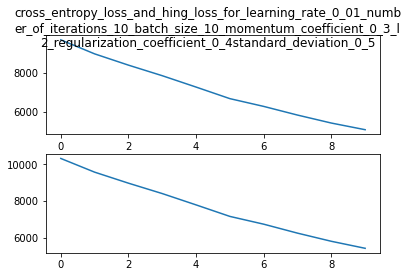

learning rate 0.01 number of iterations 10 batch_size 10 momentum coefficient 0.3 l2 regularization coefficient 0.4standard_deviation 1.5
started 0 iteration
iteration: 0 cross entropy losses: 29185.01728999406
iteration: 0 hing losses: 29997.33460672947
started 1 iteration
iteration: 1 cross entropy losses: 26919.862347435133
iteration: 1 hing losses: 27724.244025849322
started 2 iteration
iteration: 2 cross entropy losses: 25013.235180380085
iteration: 2 hing losses: 25806.050859159794
started 3 iteration
iteration: 3 cross entropy losses: 23185.75601828219
iteration: 3 hing losses: 23960.5773484509
started 4 iteration
iteration: 4 cross entropy losses: 21376.963709133775
iteration: 4 hing losses: 22144.052986586787
started 5 iteration
iteration: 5 cross entropy losses: 19730.585589903614
iteration: 5 hing losses: 20487.48081979192
started 6 iteration
iteration: 6 cross entropy losses: 18329.567265628968
iteration: 6 hing losses: 19075.12018960513
started 7 iteration
iteration: 7 cro

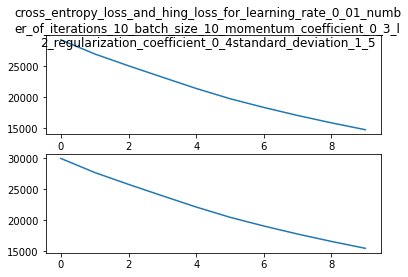

learning rate 0.01 number of iterations 10 batch_size 10 momentum coefficient 0.3 l2 regularization coefficient 0.6standard_deviation 1.5
started 0 iteration
iteration: 0 cross entropy losses: 26578.65196342424
iteration: 0 hing losses: 27374.58800465429
started 1 iteration
iteration: 1 cross entropy losses: 23696.473144790867
iteration: 1 hing losses: 24478.257375496174
started 2 iteration
iteration: 2 cross entropy losses: 21178.805854809525
iteration: 2 hing losses: 21945.458223127273
started 3 iteration
iteration: 3 cross entropy losses: 18968.476989448627
iteration: 3 hing losses: 19719.919209694104
started 4 iteration
iteration: 4 cross entropy losses: 17065.87957593093
iteration: 4 hing losses: 17812.592570592376
started 5 iteration
iteration: 5 cross entropy losses: 15222.675760609156
iteration: 5 hing losses: 15952.11699364145
started 6 iteration
iteration: 6 cross entropy losses: 13600.157669918284
iteration: 6 hing losses: 14313.51395592015
started 7 iteration
iteration: 7 c

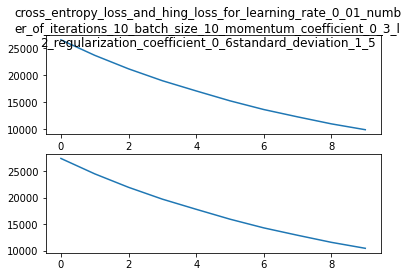

In [19]:
from textwrap import wrap
from typing import Dict
import numpy as np
# from part1 import random_indices, create_training_and_validation_sets, \
#     convert_pixel_intensity
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("error")

training_set_size = 1000
num_of_labels = 10


class Model():

    def __init__(self, training_set: Dict,
                 learning_rate: float,
                 num_of_iterations: int,
                 batch_size: int,
                 momentum_coefficient: float,
                 l2_regularization_coefficient: float,
                 standard_deviation: float,
                 training_set_shape: int,
                 model_name: str):
        valid = self.verify_training_input(learning_rate, num_of_iterations,
                                           batch_size, momentum_coefficient,
                                           l2_regularization_coefficient,
                                           standard_deviation)
        if not valid:
            print("One or more of the parameters to the model is invalid")
        self.training_set = training_set
        self.learning_rate = learning_rate
        self.num_of_iterations = num_of_iterations
        self.batch_size = batch_size
        self.momentum_coefficient = momentum_coefficient
        self.l2_regularization_coefficient = l2_regularization_coefficient
        self.standard_deviation = standard_deviation
        self.training_set_shape = training_set_shape
        self.model_name = model_name
        self.wight_vectors = None
        self.biases = None

    def verify_training_input(self, learning_rate: float,
                              num_of_iterations: int, batch_size: int,
                              momentum_coefficient: float,
                              l2_regularization_coefficient: float,
                              standard_deviation: float):
        valid = True
        if batch_size < 1 or batch_size > training_set_size:
            print(f"Batch size {batch_size} must be an integer between 1 and"
                  f"training set size {training_set_size}")
            valid = False
        if learning_rate < 0:
            print(f"Learning rate {learning_rate} must be an positive float")
            valid = False
        if momentum_coefficient <= 0 or momentum_coefficient >= 1:
            print(f"Momentum Coefficient {momentum_coefficient} must be a"
                  f"float between 1 and 0")
            valid = False
        if l2_regularization_coefficient < 0:
            print(f"L2 regularization coefficient "
                  f"{l2_regularization_coefficient} must be a non negative"
                  f"float")
            valid = False
        if standard_deviation < 0:
            print(f"Standard Deviation {standard_deviation} must be a non"
                  f"negative float")
            valid = False
        if num_of_iterations <= 0:
            print(f"Number of iterations {num_of_iterations} must be a"
                  f"positive int")
            valid = False
        return valid

    def sgd(self):
        # init wight_vectors
        self.wight_vectors = np.random.normal(loc=0, scale=self.standard_deviation,
                                              size=num_of_labels * (self.training_set_shape + 1))
        self.cross_entropy_losses = {}
        self.hing_losses = {}
        for iteration_number in range(self.num_of_iterations):
            print(f'started {iteration_number} iteration')
            # Random batch
            training_indices = random_indices(self.batch_size, training_set_size)
            v_t = np.zeros(len(self.wight_vectors))
            for training_index in training_indices:
                x = self.training_set[b'data'][training_index]
                y = self.training_set[b'labels'][training_index]
                v_t = self.momentum_coefficient * v_t - (1 - self.momentum_coefficient) * self.learning_rate * self.calc_derivative(x, y)
                self.wight_vectors += v_t
            self.cross_entropy_losses[iteration_number] = self.calc_cross_entropy_loss(self.training_set[b'data'], self.training_set[b'labels'])
            print(f"iteration: {iteration_number} cross entropy losses: {self.cross_entropy_losses[iteration_number]}")
            self.hing_losses[iteration_number] = self.calc_hinge_loss(self.training_set[b'data'], self.training_set[b'labels'])
            print(
                f"iteration: {iteration_number} hing losses: {self.hing_losses[iteration_number]}")
        return self.wight_vectors

    def plot_losses(self):
        fig, axs = plt.subplots(2)
        plt_title = f'cross_entropy_loss_and_hing_loss_for_{self.model_name}'
        fig.suptitle("\n".join(wrap(plt_title, 60)))
        axs[0].plot(list(self.cross_entropy_losses.values()))
        axs[1].plot(list(self.hing_losses.values()))
        plt.show()
        # fig.savefig(f"{plt_title}.png")
        plt.close()

    def training(self) -> None:
        theta = self.sgd()
        with open('result.txt', 'w') as f:
            as_str = ' '.join([str(v) for v in self.wight_vectors])
            f.write(as_str)
        return theta

    def inference_training_set(self):
        # if not self.wight_vectors or not self.biases:
        #     print("You need to train the model before you can run inference")
        inference_result = self.inference(self.training_set[b'data'])
        successes = 0
        for i in range(0, training_set_size):
            if inference_result[i][1] == self.training_set[b'labels'][i]:
                successes += 1
        print(f"number of successes for model {self.model_name}: {successes}")
        return successes

    def single_inference(self, x):
        max_result = None
        prediction_label = 0
        class_score = []
        for j in range(num_of_labels):
            theta, b = self.get_theta_b_i(j)
            result = np.inner(theta, x) + b
            class_score.append(result)
            max_result = result if not max_result else max(result, max_result)
            prediction_label = j if result == max_result else prediction_label
        return class_score, prediction_label

    def inference(self, set_of_instances: np.ndarray) -> np.ndarray:
        result = {}
        for i in range(set_of_instances.shape[0]):
            class_score, prediction_label = self.single_inference(set_of_instances[i])
            result[i] = (class_score, prediction_label)
        return result

    def get_theta_b_i(self, i):
        theta_i = self.wight_vectors[i:i + self.training_set_shape]
        b_i = self.wight_vectors[i + self.training_set_shape]
        return theta_i, b_i

    def calc_hinge_loss(self, training_set_data, training_set_labels):
        loss = 0
        for i in range(0, training_set_size):
            x = training_set_data[i]
            y = training_set_labels[i]
            cur_loss = 0
            r, prediction_label = self.single_inference(x)
            for label in range(0, num_of_labels):
                cur_loss = max(cur_loss, r[label] - r[y] + 1 if label != y else 0)
            loss += cur_loss
        return loss

    def calc_cross_entropy_loss(self, training_set_data, training_set_labels):
        loss = 0
        for i in range(0, training_set_size):
            x = training_set_data[i]
            y = training_set_labels[i]
            r, _ = self.single_inference(x)
            sum = 0
            for j in range(num_of_labels):
                sum += np.exp(r[j])
            loss += np.log(sum) - r[y]
        return loss

    def calc_exp(self, theta_i, b_i, x):
        try:
            return np.exp(np.inner(theta_i, x) + b_i)
        except RuntimeWarning:
            print(f"{theta_i=}")
            print(f"{x=}")
            print(f"{b_i=}")

    def calc_exp_sum(self, x):
        sum = 0
        for j in range(num_of_labels):
            theta_j, b_j = self.get_theta_b_i(j)
            try:
                exp = self.calc_exp(theta_j, b_j, x)
                sum += exp
            except (RuntimeWarning, TypeError):
                print(f"{theta_j=}")
                print(f"{x=}")
                print(f"{b_j=}")
                print(f"{exp}=")
        return sum

    def calc_derivative(self, x, y):
        vector = []
        r = [0] * num_of_labels
        r[y] = 1

        for i in range(num_of_labels):
            theta_i, b_i = self.get_theta_b_i(i)
            r_i = r[i]
            for j in range(self.training_set_shape):
                x_j = x[j]
                try:
                    derivative = x_j * (self.calc_exp(theta_i, b_i, x) / self.calc_exp_sum(x) - r_i) + 2 * self.l2_regularization_coefficient * theta_i[j]
                except RuntimeWarning:
                    print(f"{theta_i=}")
                    print(f"{x=}")
                    print(f"{b_i=}")
                    print(f"{r_i=}")
                    print(self.calc_exp(theta_i, b_i, x))
                    print(self.calc_exp_sum(x))
                vector.append(derivative)
            derivative_b = (self.calc_exp(theta_i, b_i, x) / self.calc_exp_sum(x) ) - r_i
            vector.append(derivative_b)
        return np.array(vector)



training_set, validation_set, meta = create_training_and_validation_sets()
convert_pixel_intensity(training_set)
convert_pixel_intensity(validation_set)
parameters = {1: {
    'learning_rate': 0.01,
    'batch_size': 10,
    'momentum_coefficient': 0.2,
    'l2_regularization_coefficient': 0.5,
    'standard_deviation': 0.5,
    'plot_images': True,
},
    2: {
        'learning_rate': 0.01,
        'batch_size': 10,
        'momentum_coefficient': 0.3,
        'l2_regularization_coefficient': 0.4,
        'standard_deviation': 0.5,
        'plot_images': False,
},
    3: {
        'learning_rate': 0.01,
        'batch_size': 10,
        'momentum_coefficient': 0.3,
        'l2_regularization_coefficient': 0.4,
        'standard_deviation': 1.5,
        'plot_images': False,
},
    4: {
        'learning_rate': 0.01,
        'batch_size': 10,
        'momentum_coefficient': 0.3,
        'l2_regularization_coefficient': 0.6,
        'standard_deviation': 1.5,
        'plot_images': False,
}
}
num_of_iterations = 10
training_set_shape = 3072
for i in parameters:
    model_name = f"learning rate {parameters[i]['learning_rate']} number of iterations {num_of_iterations}"\
                 f" batch_size {parameters[i]['batch_size']} momentum coefficient {parameters[i]['momentum_coefficient']} "\
                 f"l2 regularization coefficient {parameters[i]['l2_regularization_coefficient']}" \
                 f"standard_deviation {parameters[i]['standard_deviation']}"
    print(model_name)
    model = Model(training_set, parameters[i]['learning_rate'], num_of_iterations, parameters[i]['batch_size'],
                  parameters[i]['momentum_coefficient'], parameters[i]['l2_regularization_coefficient'],
                  parameters[i]['standard_deviation'], training_set_shape, model_name.replace(" ", "_").replace(".", "_"))
    model.training()
    model.plot_losses()
    if parameters[i]['plot_images']:
        plot_random_images(training_set, meta, "training_set_images")
        plot_random_images(validation_set, meta, "validation_set_images")


In [20]:
## Part 3

started 0 iteration
iteration: 0 cross entropy losses: 18806.60294049113
iteration: 0 hing losses: 19541.884898978464
started 1 iteration
iteration: 1 cross entropy losses: 11430.031813901602
iteration: 1 hing losses: 12062.979381869873
started 2 iteration
iteration: 2 cross entropy losses: 8850.651327902939
iteration: 2 hing losses: 9410.155445281747
started 3 iteration
iteration: 3 cross entropy losses: 7993.522922893941
iteration: 3 hing losses: 8513.135305332711
started 4 iteration
iteration: 4 cross entropy losses: 8960.469459301386
iteration: 4 hing losses: 9452.898373490032
started 5 iteration
iteration: 5 cross entropy losses: 12758.197232821878
iteration: 5 hing losses: 13331.325149033619
started 6 iteration
iteration: 6 cross entropy losses: 7886.511081726676
iteration: 6 hing losses: 8319.83302135369
started 7 iteration
iteration: 7 cross entropy losses: 5709.241336006144
iteration: 7 hing losses: 6066.20739048974
started 8 iteration
iteration: 8 cross entropy losses: 6544.0

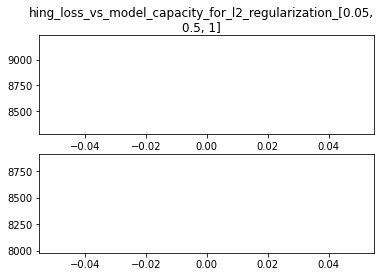

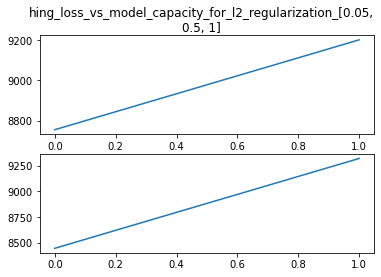

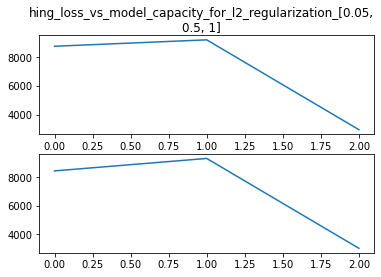

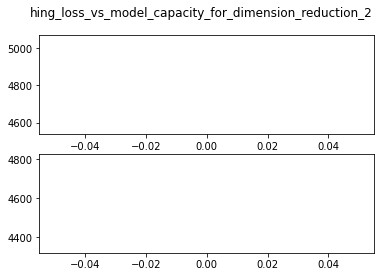

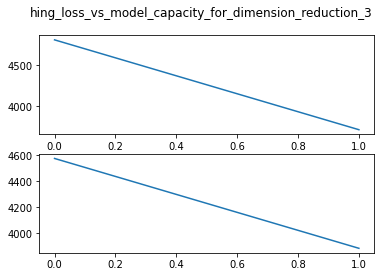

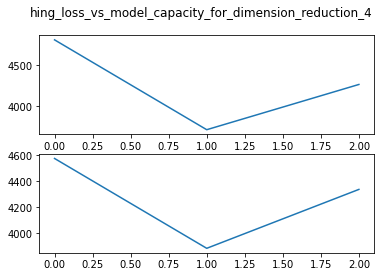

In [21]:
from textwrap import wrap

import numpy as np
import matplotlib.pyplot as plt

# from part1 import create_training_and_validation_sets, convert_pixel_intensity, \
#     plot_random_images
# from part2 import Model


def instance_dimension_reduction(data_set, d):
    for index in range(data_set[b'data'].shape[0]):
        img = data_set[b'data'][index]
        img_r = img[0:1024].reshape(32, 32)
        img_g = img[1024:2048].reshape(32, 32)
        img_b = img[2048:].reshape(32, 32)
        img_r_new = np.zeros((32, 32))
        img_g_new = np.zeros((32, 32))
        img_b_new = np.zeros((32, 32))
        for i in range(33 - d):
            for j in range(33 - d):
                r_average = []
                g_average = []
                b_average = []
                for k in range(d):
                    r_average.append(img_r[i+k, j:j+d])
                    g_average.append(img_g[i + k, j:j + d])
                    b_average.append(img_b[i + k, j:j + d])
                r = np.average(r_average)
                g = np.average(g_average)
                b = np.average(b_average)
                img_r_new[i, j] = r
                img_g_new[i, j] = g
                img_b_new[i, j] = b
        new_img = np.concatenate((img_r_new.flatten(), img_g_new.flatten(),
                                  img_b_new.flatten()))
        data_set[b'data'][index] = new_img
    return data_set


def plot_hinge_loss_vs_model_capacity(losses, model_name):
    fig, axs = plt.subplots(2)
    plt_title = f'hing_loss_vs_model_capacity_for_{model_name}'
    fig.suptitle("\n".join(wrap(plt_title, 60)))
    axs[0].plot(list(losses['training'].values()))
    axs[1].plot(list(losses['validation'].values()))
    # plt.show()
    fig.savefig(f"{plt_title}.png")


def main_part_3(training_set, validation_set, meta):
    # For regularization
    # optimize over the training set
    convert_pixel_intensity(training_set)
    convert_pixel_intensity(validation_set)
    batch_size = 30
    learning_rate = 0.1
    num_of_iterations = 10
    momentum_coefficient = 0.3
    standard_deviation = 1
    l2_regularization = [0.05, 0.5, 1]
    losses = {'training': {}, 'validation': {}}
    training_set_shape = 3072
    for l in l2_regularization:
        model_name = f"l2_regularization_{l2_regularization}"
        model = Model(training_set, learning_rate, num_of_iterations,
                      batch_size, momentum_coefficient, l, standard_deviation,
                      training_set_shape, model_name)
        model.training()
        # measure the classification error
        losses['training'][l] = model.hing_losses[num_of_iterations-1]
        losses['validation'][l] = model.calc_hinge_loss(validation_set[b'data'], validation_set[b'labels'])
        print(losses)
        # generate a plot showing training and validation errors vs. model capacity
        plot_hinge_loss_vs_model_capacity(losses, model_name)

    # For instance dimension reduction
    # optimize over the training set
    training_set, validation_set, meta = create_training_and_validation_sets()
    convert_pixel_intensity(training_set)
    convert_pixel_intensity(validation_set)
    l2_regularization = 0.5
    dimension_reduction = [2, 3, 4]
    losses = {'training': {}, 'validation': {}}
    for d in dimension_reduction:
        model_name = f"dimension_reduction_{d}"
        training_set_dim_d = instance_dimension_reduction(training_set, d)
        model = Model(training_set_dim_d, learning_rate, num_of_iterations,
                      batch_size, momentum_coefficient, l2_regularization,
                      standard_deviation, training_set_shape,
                      model_name)
        model.training()
        # measure the classification error
        losses['training'][d] = model.hing_losses[num_of_iterations - 1]
        validation_set_dim_d = instance_dimension_reduction(validation_set, d)
        losses['validation'][d] = model.calc_hinge_loss(
            validation_set_dim_d[b'data'], validation_set_dim_d[b'labels'])
        print(losses)
        # generate a plot showing training and validation errors vs. model capacity
        plot_hinge_loss_vs_model_capacity(losses, model_name)



training_set, validation_set, meta = create_training_and_validation_sets()
main_part_3(training_set, validation_set, meta)

In [22]:
## part 4

In [24]:
import math
# from part1 import create_training_and_validation_sets, plot_image, \
#     convert_pixel_intensity
# from part2 import Model
# import part2
import matplotlib.pyplot as plt
import numpy as np

# from part3 import plot_hinge_loss_vs_model_capacity

weight = height = 32
counter = 0

def to_greyscale(img):
    return np.average(img, axis=2)

def calc_gradient_images(img):
    global counter
    counter += 1
    img = to_greyscale(img)
    new_img = []
    magnitudes = []
    angles = []
    for i in range(height):
        for j in range(weight):
            gx = img[i, min(height-1, j+1)] - img[i, max(0, j-1)]
            gy = img[max(0, i-1), j] - img[min(weight-1, i+1), j]
            magnitude = math.sqrt(pow(gx, 2) + pow(gy, 2))
            magnitudes.append(magnitude)
            angle = math.degrees(0.0) if gx == 0 else abs(math.atan(gy/gx))
            angles.append(angle)
    new_img.extend(magnitudes)
    new_img.extend(angles)
    return np.array(new_img)

def hogify(image_set):
    images = []
    for img in image_set:
        image_r = img[0:1024].reshape(32, 32)
        image_g = img[1024:2048].reshape(32, 32)
        image_b = img[2048:].reshape(32, 32)
        img = np.dstack((image_r, image_g, image_b))
        images.append(img)
    return [calc_gradient_images(img) for img in images]

def main_part_4(training_set, validation_set, meta):
    training_set[b'data'] = hogify(training_set[b'data'])
    validation_set[b'data'] = hogify(validation_set[b'data'])
    batch_size = 30
    learning_rate = 0.1
    num_of_iterations = 30
    momentum_coefficient = 0.3
    standard_deviation = 1
    l2_regularization = 0.5
    losses = {'training': {}, 'validation': {}}
    model_name = f"HOG"
    training_set_shape = 32*32*2
    convert_pixel_intensity(training_set)
    convert_pixel_intensity(validation_set)
    model = Model(training_set, learning_rate, num_of_iterations,
                  batch_size, momentum_coefficient, l2_regularization,
                  standard_deviation, training_set_shape, model_name)
    model.training()
    # measure the classification error
    losses['training'] = model.hing_losses[num_of_iterations-1]
    losses['validation'] = model.calc_hinge_loss(validation_set[b'data'], validation_set[b'labels'])
    print(losses)
, 

training_set, validation_set, meta = create_training_and_validation_sets()
main_part_4(training_set, validation_set, meta)


started 0 iteration
iteration: 0 cross entropy losses: 3431.0235942168906
iteration: 0 hing losses: 3517.852972916509
started 1 iteration
iteration: 1 cross entropy losses: 4647.002683723945
iteration: 1 hing losses: 5103.780993463887
started 2 iteration
iteration: 2 cross entropy losses: 4008.668248566236
iteration: 2 hing losses: 4355.441968920179
started 3 iteration
iteration: 3 cross entropy losses: 4815.580426903697
iteration: 3 hing losses: 5250.575369084114
started 4 iteration
iteration: 4 cross entropy losses: 5262.545896032833
iteration: 4 hing losses: 5721.614234876902
started 5 iteration
iteration: 5 cross entropy losses: 5353.501670474019
iteration: 5 hing losses: 5818.515475432168
started 6 iteration
iteration: 6 cross entropy losses: 4736.682361777118
iteration: 6 hing losses: 5164.095868141793
started 7 iteration
iteration: 7 cross entropy losses: 4679.1401491633405
iteration: 7 hing losses: 5118.905497854423
started 8 iteration
iteration: 8 cross entropy losses: 4505.39

In [25]:
## Part 5

started 0 iteration
iteration: 0 cross entropy losses: 15582.729496916514
iteration: 0 hing losses: 16301.037262366755
started 1 iteration
iteration: 1 cross entropy losses: 13382.328677987542
iteration: 1 hing losses: 14079.469739626305
started 2 iteration
iteration: 2 cross entropy losses: 8750.94136883177
iteration: 2 hing losses: 9346.400957152411
started 3 iteration
iteration: 3 cross entropy losses: 8803.471171636045
iteration: 3 hing losses: 9405.739654039793
started 4 iteration
iteration: 4 cross entropy losses: 8954.983032038053
iteration: 4 hing losses: 9505.514049582964
started 5 iteration
iteration: 5 cross entropy losses: 7212.548421013402
iteration: 5 hing losses: 7710.748528917293
started 6 iteration
iteration: 6 cross entropy losses: 7816.909003375736
iteration: 6 hing losses: 8310.69115492238
started 7 iteration
iteration: 7 cross entropy losses: 8705.107047634623
iteration: 7 hing losses: 9204.890814205683
started 8 iteration
iteration: 8 cross entropy losses: 7573.53

iteration: 4 cross entropy losses: 5583.048062780789
iteration: 4 hing losses: 6034.185368816072
started 5 iteration
iteration: 5 cross entropy losses: 7203.642211395794
iteration: 5 hing losses: 7584.632247847465
started 6 iteration
iteration: 6 cross entropy losses: 7218.385042501487
iteration: 6 hing losses: 7596.48327505118
started 7 iteration
iteration: 7 cross entropy losses: 8329.25477528141
iteration: 7 hing losses: 8665.245550110778
started 8 iteration
iteration: 8 cross entropy losses: 10265.951168275566
iteration: 8 hing losses: 10766.855613090955
started 9 iteration
iteration: 9 cross entropy losses: 12202.409207029543
iteration: 9 hing losses: 12814.993123053886
started 10 iteration
iteration: 10 cross entropy losses: 11777.333301414723
iteration: 10 hing losses: 12366.129205381909
started 11 iteration
iteration: 11 cross entropy losses: 12597.536532550977
iteration: 11 hing losses: 13239.737974939013
started 12 iteration
iteration: 12 cross entropy losses: 11756.823815193

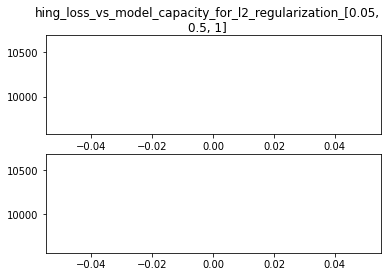

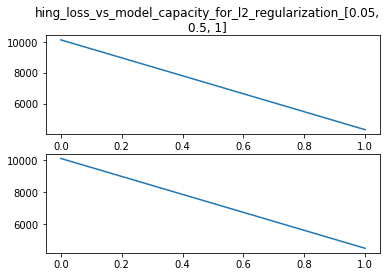

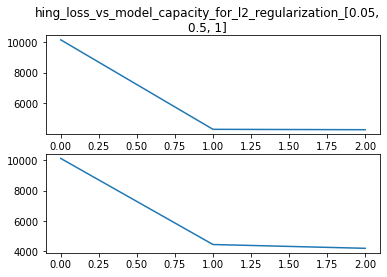

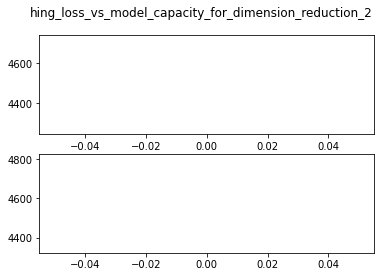

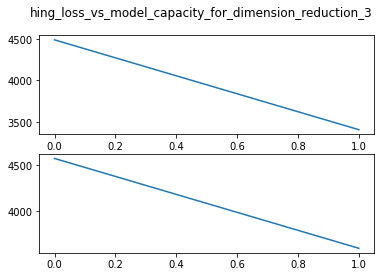

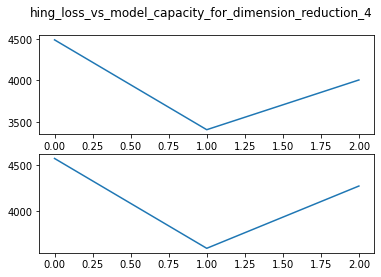

In [28]:
# from part1 import create_training_and_validation_sets
# from part3 import main_part_3
# from part4 import main_part_4


def main_part5():
    training_set, validation_set, meta = create_training_and_validation_sets(10000)
    main_part_3(training_set, validation_set, meta)
    main_part_4(training_set, validation_set, meta)


main_part5()

In [29]:
## part 6

started 0 iteration
iteration: 0 cross entropy losses: 8491.128671664586
iteration: 0 hing losses: 9071.82582131321
started 1 iteration
iteration: 1 cross entropy losses: 7878.228144039703
iteration: 1 hing losses: 8431.935998436837
started 2 iteration
iteration: 2 cross entropy losses: 7324.721955554224
iteration: 2 hing losses: 7852.143153907989
started 3 iteration
iteration: 3 cross entropy losses: 6818.1008530721965
iteration: 3 hing losses: 7319.845495853377
started 4 iteration
iteration: 4 cross entropy losses: 6370.076220339526
iteration: 4 hing losses: 6844.214889807988
started 5 iteration
iteration: 5 cross entropy losses: 5998.7481667481
iteration: 5 hing losses: 6440.937799217756
started 6 iteration
iteration: 6 cross entropy losses: 5684.967984667959
iteration: 6 hing losses: 6104.013420999389
started 7 iteration
iteration: 7 cross entropy losses: 5354.13782309888
iteration: 7 hing losses: 5739.931843147331
started 8 iteration
iteration: 8 cross entropy losses: 5127.2419732

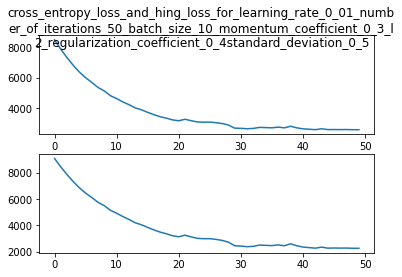

In [30]:
import os
from typing import Dict

# from part1 import create_training_and_validation_sets, convert_pixel_intensity, \
#     unpickle
# from part2 import Model


def create_training_and_testing_sets() -> (Dict, Dict, Dict):
    # load dataset
    path = os.path.join(os.getcwd(), "cifar-10", "cifar-10-batches-py")
    batches = {}
    for i in range(1, 6):
        batch = unpickle(os.path.join(path, f"data_batch_{i}"))
        batches[i] = batch
    training_set = {
        b'batch_label': b'batches 1 to 5',
        b'labels': [label for i, batch in batches.items() for label in batch[b'labels']],
        b'data': [label for i, batch in batches.items() for label in batch[b'data']],
        b'filenames': [label for i, batch in batches.items() for label in batch[b'filenames']],
    }
    test_set = unpickle(os.path.join(path, "test_batch"))
    meta = unpickle(os.path.join(path, "batches.meta"))
    return training_set, test_set, meta


training_set, test_set, meta = create_training_and_testing_sets()
convert_pixel_intensity(training_set)
convert_pixel_intensity(test_set)
learning_rate = 0.01
num_of_iterations = 50
batch_size = 10
momentum_coefficient = 0.3
l2_regularization_coefficient = 0.4
standard_deviation = 0.5
training_set_shape = 3072
model_name = f"learning rate {learning_rate} number of iterations {num_of_iterations}" \
             f" batch_size {batch_size} momentum coefficient {momentum_coefficient} " \
             f"l2 regularization coefficient {l2_regularization_coefficient}" \
             f"standard_deviation {standard_deviation}"
model = Model(training_set, learning_rate, num_of_iterations,
              batch_size,
              momentum_coefficient, l2_regularization_coefficient,
              standard_deviation, training_set_shape,
              model_name.replace(" ", "_").replace(".", "_"))
model.training()
model.plot_losses()